In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get data
data = fetch_covtype()
X = data.data
y = data.target
y = y - 1

In [3]:
# Standardize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
input_dimension = X_train.shape[1]
targets = 7

In [4]:
# Model
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(input_dimension,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(targets, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 40583 (158.53 KB)
Trainable params: 40583 

In [5]:
# Train
training_history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
11621/11621 [==============================] - 40s 3ms/step - loss: 0.5062 - accuracy: 0.7846 - val_loss: 0.4138 - val_accuracy: 0.8277
Epoch 2/20
11621/11621 [==============================] - 38s 3ms/step - loss: 0.3746 - accuracy: 0.8445 - val_loss: 0.3348 - val_accuracy: 0.8629
Epoch 3/20
11621/11621 [==============================] - 38s 3ms/step - loss: 0.3219 - accuracy: 0.8675 - val_loss: 0.3062 - val_accuracy: 0.8755
Epoch 4/20
11621/11621 [==============================] - 36s 3ms/step - loss: 0.2894 - accuracy: 0.8820 - val_loss: 0.2734 - val_accuracy: 0.8888
Epoch 5/20
11621/11621 [==============================] - 37s 3ms/step - loss: 0.2690 - accuracy: 0.8906 - val_loss: 0.2726 - val_accuracy: 0.8908
Epoch 6/20
11621/11621 [==============================] - 36s 3ms/step - loss: 0.2545 - accuracy: 0.8970 - val_loss: 0.2472 - val_accuracy: 0.9017
Epoch 7/20
11621/11621 [==============================] - 43s 4ms/step - loss: 0.2441 - accuracy: 0.9014 - val_loss: 0

3632/3632 [==============================] - 7s 2ms/step - loss: 0.2076 - accuracy: 0.9177
Test Accuracy: 0.918
3632/3632 [==============================] - 7s 2ms/step


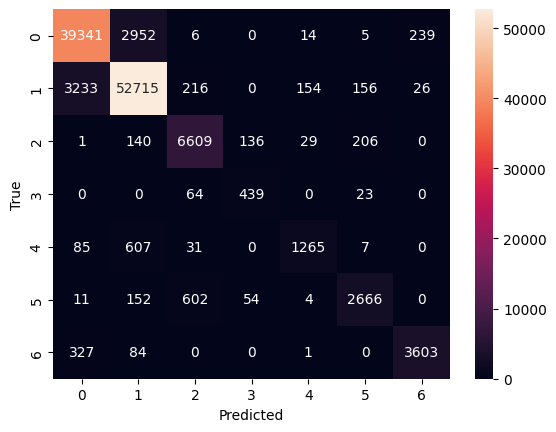

In [6]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()